In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import os
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
subj='/content/gdrive/My Drive/Casia_B_Croped_Image'
sub_n=os.listdir(subj)
sub_n.sort()
sub_n_path=[os.path.join(subj,s) for s in sub_n]

In [0]:
t=os.listdir(sub_n_path[0])
t.sort()

In [0]:
nm05=[]
nm06=[]
for i in sub_n_path[:5]:
  walking_type=os.listdir(i)
  walking_type.sort()
  nm_05=walking_type[8]
  nm_06=walking_type[9]
  nm_05_path=os.listdir(os.path.join(i,nm_05))
  nm_06_path=os.listdir(os.path.join(i,nm_06))
  x=np.zeros((200,200))
  y=np.zeros((200,200))
  temp_arr05=[]
  temp_arr06=[]
  for j in range(len(nm_05_path)):
    img_path=os.path.join(os.path.join(i,nm_05),nm_05_path[j])
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(256,256))
    #img=np.array(img).astype('float32')/255
    ret,img_=cv2.threshold(img,127,1,cv2.THRESH_BINARY)
    temp_arr05.append(img_)
    #x=x+img
  #cv2_imshow(x/len(nm_path)*255)
  nm05.append(temp_arr05)
  # for j in range(len(nm_06_path)):
  #   img_path=os.path.join(os.path.join(i,nm_06),nm_06_path[j])
  #   img=cv2.imread(img_path)
  #   img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #   img=cv2.resize(img,(256,256))
  #   img=np.array(img).astype('float32')/255
  #   temp_arr06.append(img)
  #   #x=x+img
  # #cv2_imshow(x/len(nm_path)*255)
  # nm06.append(temp_arr06)
  #cv2_imshow(x/len(nm_path)*255)

In [0]:
nm05=np.asarray(nm05)
nm06=np.asarray(nm06)

In [0]:
temp_nm05=nm05
for i in range(len(temp_nm05)):
  temp_nm05[i]=np.asarray(temp_nm05[i])

  
occ_nm05=temp_nm05
blank=np.zeros((256,256))
for k in range(len(temp_nm05)):
  for i in range(10,int(len(temp_nm05[k])),15):
    if i+5<= len(temp_nm05[k]):
      for j in range(i,i+5):
        occ_nm05[k][j]=blank

In [0]:
def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = tf.reduce_sum(tf.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (tf.reduce_sum(tf.square(y_true),-1) + tf.reduce_sum(tf.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return dice_coef(y_true, y_pred)

In [0]:
from keras.models import load_model
import tensorflow as tf
frame_gen=load_model('/content/gdrive/My Drive/prediction_model.h5',custom_objects={'dice_coef_loss':dice_coef_loss})

In [0]:
occ_nm05=temp_nm05
blank=np.zeros((256,256))
for k in range(len(temp_nm05)):
  for i in range(10,int(len(temp_nm05[k])),15):
    if i+5<= len(temp_nm05[k]):
      for j in range(i,i+5):
        #print(i,i+5)
        if i == 10:
          occ_nm05[k][j]=np.squeeze(frame_gen.predict(np.expand_dims(np.expand_dims(occ_nm05[k][:j],axis=0),axis=4)))[0]*255
          #print(i,i+5)
        else:
          occ_nm05[k][j]=np.squeeze(frame_gen.predict(np.expand_dims(np.expand_dims(occ_nm05[k][:j],axis=0),axis=4)))[0]


In [0]:
cv2_imshow(occ_nm05[0][12]*255)

In [0]:
from scipy.io import loadmat
r=loadmat('/content/gdrive/My Drive/results.mat')

In [0]:
r.keys()

In [0]:
recon=[]
for i in sub_n:
  recon.append(r[i])
recon=np.asarray(recon)

In [0]:
cv2_imshow(np.squeeze(recon[1][0])*255)

In [0]:
geis=[]
for i  in range(len(recon)):
  gei=np.zeros((256,256,1))
  for j in range(len(recon[i])):
    gei=gei+recon[i][j]
  geis.append(gei)
geis=np.asarray(geis)

In [0]:
geis.shape

In [0]:
from scipy.io import loadmat
r=loadmat('/content/gdrive/My Drive/results.mat')

In [0]:
r.keys()

In [0]:
#sub_n

In [0]:
const=[]
y_const=[]
for i in sub_n:
  const.append(r[i])
  y_const.append(i)
const=np.asarray(const)
y_const=np.asarray(y_const)

In [0]:
#y_const

In [0]:
#cv2_imshow(np.squeeze(const[0][28])*255)

In [0]:
rec_gei=[]
for i in range(106):
  temp=np.zeros((256,256,1))
  for j in range(len(const[i])):
    temp=temp+const[i][j]
  rec_gei.append(temp/len(const[i]))
rec_gei=np.asarray(rec_gei)

In [0]:
rec_gei.shape

(106, 256, 256, 1)

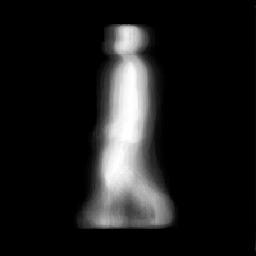

In [0]:
cv2_imshow(np.squeeze(rec_gei[3])*255)

In [0]:
import os
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

## **Start Running Code From HERE**

In [0]:
folder_path='/content/gdrive/My Drive/Casia_BGEI_1'
subs=os.listdir(folder_path)
act_geis=[]
Y=[]
for i in subs:
  if int(i) != 121:
    subj_path=os.path.join(folder_path,i)
    geis=os.listdir(subj_path)
    temp=[]
    t=[]
    for j in geis:
      temp.append(np.array(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(subj_path,j)),cv2.COLOR_BGR2GRAY),(128,128))).astype('float32') / 255)
      t.append(i)
    Y.append(np.asarray(t))
    act_geis.append(np.asarray(temp)) 
act_geis=np.asarray(act_geis)
Y=np.asarray(Y)

In [6]:
subs

['001',
 '002',
 '003',
 '004',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '029',
 '030',
 '031',
 '032',
 '033',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '047',
 '049',
 '050',
 '051',
 '052',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '066',
 '069',
 '070',
 '071',
 '072',
 '073',
 '075',
 '078',
 '079',
 '080',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '099',
 '100',
 '101',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124']

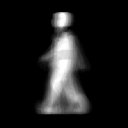

In [7]:
cv2_imshow(act_geis[1][0]*255)

In [8]:
act_geis.shape

(105, 6, 128, 128)

In [9]:
Y.shape

(105, 6)

In [0]:
train=[]
ytrain=[]
for i in range(105):
  for j in range(6):
    train.append(act_geis[i][j])
    ytrain.append(Y[i][j])
train=np.asarray(train)
ytrain=np.asarray(ytrain)

In [11]:
train[0].shape

(128, 128)

In [12]:
ytrain[12]

'003'

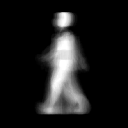

In [13]:
cv2_imshow(train[7]*255)

In [14]:
#train.shape
train_=[]
for i in range(len(train)):
  train_.append(train[i].flatten())
train_=np.asarray(train_)
train_.shape

(630, 16384)

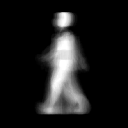

In [15]:
cv2_imshow(train_[7].reshape((128,128))*255)

In [0]:
import random
#combined = list(zip(train_, ytrain))
##random.shuffle(combined)

#train_[:], ytrain[:] = zip(*combined)
#s=np.arange(636)
s=np.arange(630)
np.random.shuffle(s)
train_=train_[s]
ytrain=ytrain[s]

In [0]:
train_=np.squeeze(train_)
ytrain=np.squeeze(ytrain)

In [18]:
print(s)

[225 133 428 374 455 358 414 202 435 105 373 372 165 604 498 500 193 573
  80 402 247 334 254 211 577  45 329 359 239 166 319 203 564 129 106 126
 610 270 297 150 560  61 233 161 586  62 511 392 332 452 432 507 330 153
 522 183 488   0 262  87 587  26 124 438   4  55 601   8 274 504 123 420
 346 493 206 235 266 559 139  18 394 431 623 405 602 322  85 264  56 292
 230  50 275  52 108 251 119 540 508 574 159 144 265 406 553 423 164 368
 545 248 299 377 590 401 307 544 528 249 579  99 343 549 229  68  30 603
 196 199 505 255  69 295 411 111 197 234 516  37 375 238 175 142 589 606
  32 207 333 176 425 506 101  66 444  38  15 313 445 162 317  36 575 417
 591 366 147  76 344 369 612  31 152 532 362 261 561 241 607 298 475  10
 499 371 267 531 548 474 122 481 620   2 403  96 585 269 464 113 364 615
 429 472 388 611 355 501 457  73 408 367 477  44 315 325 538  19 278 342
 316 450 469 441 256  77  41 572 439 136 360 205 456 480 541 467 209 521
 217  98 537 107 290  48 566 383 533 143 260  39 44

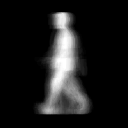

In [19]:
cv2_imshow(train_[6].reshape((128,128))*255)

In [20]:
ytrain[6]

'084'

In [0]:
from sklearn.decomposition import PCA

pca = PCA(0.98)
X_trans = pca.fit_transform(train_)


In [22]:
X_trans.shape

(630, 159)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val , y_train, y_val = train_test_split(X_trans, ytrain, test_size = 0.2)

In [0]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier


alg = RandomForestClassifier(n_estimators=800,criterion='entropy')

In [25]:
alg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_train = alg.predict(X_train)
y_pred_val   = alg.predict(X_val)

In [27]:
from sklearn import metrics
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Val Accuracy:",metrics.accuracy_score(y_val, y_pred_val))

Train Accuracy: 1.0
Val Accuracy: 0.9920634920634921


In [0]:
rec=[]
for i in range(106):
  #for j in range(4):
  rec.append(cv2.resize(rec_gei[i],(128,128)))
rec=np.asarray(rec)

In [0]:
rec.shape

In [0]:

test=[]
for i in range(106):
  test.append(rec[i].flatten())
test=np.asarray(test)

In [0]:
test.shape

In [0]:
ytest=pca.transform(test)

In [0]:
cv2_imshow(test[1].reshape(128,128)*255)
#cv2_imshow(np.squeeze(rec[1])*255)

In [0]:
metrics.accuracy_score(y_const, alg.predict(ytest))

In [0]:
alg.predict(ytest)

## **Test on recon 5% Occ**

In [28]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
from scipy.io import loadmat
r=loadmat('/content/gdrive/My Drive/Results_GAIT/10_frames_occ_created_06/res_mat_05_40%.mat')

In [196]:
r.keys()

dict_keys(['__header__', '__version__', '__globals__', '009', '003', '006', '001', '008', '002', '004', '011', '007', '010', '012', '018', '015', '013', '016', '019', '014', '021', '017', '020', '025', '031', '023', '024', '026', '027', '032', '029', '030', '022', '035', '043', '041', '033', '038', '036', '039', '040', '042', '037', '044', '049', '050', '045', '051', '047', '054', '056', '055', '052', '057', '060', '063', '058', '061', '066', '070', '069', '059', '062', '078', '083', '082', '084', '072', '073', '079', '071', '075', '080', '087', '088', '092', '091', '094', '085', '093', '090', '089', '086', '101', '103', '105', '106', '096', '095', '097', '099', '104', '100', '113', '108', '111', '115', '107', '112', '110', '117', '118', '114', '123', '119', '124', '120', '122'])

In [0]:
import os
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
subj='/content/gdrive/My Drive/Casia_B_Croped_Image'
sub_n=os.listdir(subj)
sub_n.sort()

In [0]:
const=[]
y_const=[]
for i in sub_n:
  if int(i)!=121:
    const.append(r[i])
    y_const.append(i)
const=np.asarray(const)
y_const=np.asarray(y_const)

In [199]:
const[0].shape

(29, 256, 256, 1)

In [0]:
rec_gei=[]
for i in range(105):
  temp=np.zeros((256,256,1))
  for j in range(len(const[i])):
    temp=temp+const[i][j]
  rec_gei.append(temp/len(const[i]))
rec_gei=np.asarray(rec_gei)

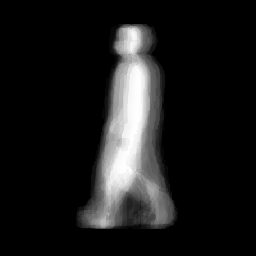

In [201]:
cv2_imshow(np.squeeze(rec_gei[3])*255)

In [0]:
rec=[]
for i in range(105):
  #for j in range(4):
  rec.append(cv2.resize(rec_gei[i],(128,128)))
rec=np.asarray(rec)

In [203]:
rec.shape

(105, 128, 128)

In [0]:
test=[]
for i in range(105):
  test.append(rec[i].flatten())
test=np.asarray(test)

In [0]:
ytest=pca.transform(test)

In [206]:
metrics.accuracy_score(y_const, alg.predict(ytest))

0.5238095238095238

In [0]:
prob=alg.predict_proba(ytest)

In [179]:
ytest.shape

(105, 159)

In [208]:
prob.shape

(105, 105)

In [209]:
alg.predict(ytest)

array(['042', '112', '115', '035', '006', '007', '087', '094', '010',
       '106', '012', '099', '087', '015', '016', '032', '018', '019',
       '020', '021', '022', '023', '026', '087', '026', '033', '029',
       '030', '031', '032', '033', '021', '036', '037', '038', '032',
       '084', '041', '042', '060', '044', '087', '013', '035', '052',
       '051', '052', '054', '055', '056', '057', '058', '106', '060',
       '061', '015', '087', '020', '021', '070', '094', '060', '073',
       '042', '035', '041', '057', '035', '083', '084', '035', '106',
       '087', '088', '099', '099', '091', '009', '093', '094', '112',
       '096', '082', '099', '016', '101', '099', '104', '105', '106',
       '107', '108', '110', '010', '037', '113', '042', '115', '037',
       '031', '026', '035', '122', '123', '084'], dtype='<U3')

In [210]:
max(prob[3])

0.0425

In [0]:
ans=[]
for i in range(105):
  ans.append(np.argmax(prob[i]))
ans=np.asarray(ans)

In [212]:
ans

array([ 38,  94,  97,  31,   4,   5,  72,  79,   8,  89,  10,  83,  72,
        13,  14,  29,  16,  17,  18,  19,  20,  21,  24,  72,  24,  30,
        26,  27,  28,  29,  30,  19,  32,  33,  34,  29,  69,  37,  38,
        53,  40,  72,  11,  31,  46,  45,  46,  47,  48,  49,  50,  51,
        89,  53,  54,  13,  72,  18,  19,  59,  79,  53,  62,  38,  31,
        37,  50,  31,  68,  69,  31,  89,  72,  73,  83,  83,  76,   7,
        78,  79,  94,  81,  67,  83,  14,  85,  83,  87,  88,  89,  90,
        91,  92,   8,  33,  95,  38,  97,  33,  28,  24,  31, 102, 103,
        69])

In [0]:
a=0
for i in range(105):
  sort=np.argsort(prob[i])
  #print(sort[105]==i,sort[105], i)
  equal=[j for j in range(105) if prob[i][j] == prob[i][np.argmax(prob[i])]]
  

  

 
  equal=np.asarray(equal)
  
  for j in range(len(equal)):
    if i==equal[j]:
      a=a+1
      break

In [223]:
a/105

0.5428571428571428

In [0]:
   ####Rank2##
  second_highest_element=np.unique(prob[i])[len(np.sort(np.unique(prob[i])))-2]
  for k in range(len(prob[i])):
    if prob[i][k] == second_highest_element:
      equal.append(k)
  
   ####Rank3##
  third_highest_element=np.unique(prob[i])[len(np.sort(np.unique(prob[i])))-3]
  for k in range(len(prob[i])):
    if prob[i][k] == third_highest_element:
      equal.append(k)

 ####Rank4##
  fourth_highest_element=np.unique(prob[i])[len(np.sort(np.unique(prob[i])))-4]
  for k in range(len(prob[i])):
    if prob[i][k] == fourth_highest_element:
      equal.append(k)
 ####Rank5##
  fifth_highest_element=np.unique(prob[i])[len(np.sort(np.unique(prob[i])))-5]
  for k in range(len(prob[i])):
    if prob[i][k] == fifth_highest_element:
      equal.append(k)


## **Using KNN**